In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [55]:
pip install emcee

In [57]:
pip install corner

In [58]:
import emcee
import corner

Text(0, 0.5, 'y')

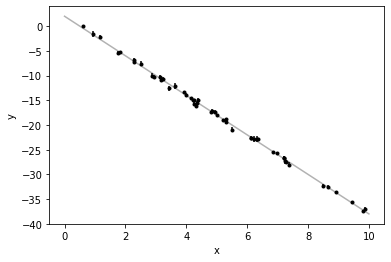

In [111]:
np.random.seed(123)
m_true=-4
b_true=2
#Let's generate some synthetic data
N=50
x=10*np.random.rand(N)
x=np.sort(x)##Sortting the x values
yerr=0.1+0.5*np.random.rand(N)
y=m_true*x+b_true
y=y+yerr*np.random.randn(N)
plt.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0)
x0=np.linspace(0,10,500)
plt.plot(x0,m_true*x0+b_true,'k',alpha=0.3,)
plt.xlabel('x')
plt.ylabel('y')

We have to define likelihood function so we go with a gaussian: \\
model=mx+b \\
p(y|x,$\sigma,m,b)=-0.5 \sum\frac{(y-model)^2}{\sigma ^2} + \log(2\pi\sigma^2)$

In [112]:
#we define likelihood function
def log_likelihood(theta,x,y,yerr):
  m,b=theta
  model=m*x+b
  sigma=yerr**2
  return -0.5*np.sum((y-model)**2/sigma+np.log(sigma))

In order estimate parameter we must minimize the likelihood function,so we use the tool from scipy to minimize it.

In [113]:
from scipy.optimize import minimize
nll=lambda *args : -log_likelihood(*args)
initial=np.array([m_true,b_true])+0.1*np.random.randn(2)
soln=minimize(nll,initial,args=(x,y,yerr))
m_ml,b_ml=soln.x
print('#########Maximum likelihood estimates:########')
print('m={:.3f}'.format(m_ml))
print('b={:.3f}'.format(b_ml))

#########Maximum likelihood estimates:########
m=-4.012
b=2.105


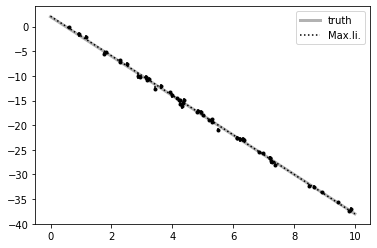

In [114]:
plt.errorbar(x,y,yerr=yerr,fmt='.k',capsize=0)
plt.plot(x0,m_true*x0+b_true,'k',alpha=0.3,lw=3,label='truth')
plt.plot(x0,np.dot(np.vander(x0,2),[m_ml,b_ml]),':k',label='Max.li.')
plt.legend()

In [115]:
##we define log_prior
def log_prior(theta):
  m,b=theta
  if -5.0<m<5.0 and -5.0<b<7.0:
    return 0.0
  return -np.inf

In [116]:
#here we combine the log_likelihood and log_prior
def log_probability(theta,x,y,yerr):
  lp=log_prior(theta)
  if not np.isfinite(lp):
    return -np.inf
  return lp+log_likelihood(theta,x,y,yerr)

In [117]:
pos=soln.x+1e-4*np.random.randn(32,2)
nwalkers,ndim=pos.shape
sampler=emcee.EnsembleSampler(nwalkers,ndim,log_probability,args=(x,y,yerr))
sampler.run_mcmc(pos,5000,progress=True)

100%|██████████| 5000/5000 [00:06<00:00, 736.22it/s]


State([[-4.03451908  2.23010482]
 [-4.03192679  2.20651784]
 [-4.00613903  2.13051937]
 [-4.00278448  2.09492757]
 [-3.9985047   2.1146781 ]
 [-4.04898397  2.29507979]
 [-4.02792219  2.2379535 ]
 [-4.03329571  2.18957184]
 [-4.01786249  2.16308679]
 [-4.01355515  2.09115424]
 [-4.01279616  2.16496171]
 [-4.04041024  2.21156122]
 [-4.03346946  2.17862952]
 [-4.00848963  2.08095368]
 [-3.99034881  2.05280516]
 [-4.00733968  2.09989932]
 [-4.00745873  2.05820111]
 [-4.04358981  2.28412156]
 [-3.98361401  1.91369887]
 [-3.98346714  2.00967379]
 [-4.02044581  2.16071575]
 [-4.00843688  2.13567365]
 [-3.96340004  1.76810133]
 [-4.03715618  2.20965487]
 [-4.02673512  2.23008983]
 [-4.00760799  2.07960774]
 [-4.02192324  2.17113674]
 [-4.00901333  2.00897705]
 [-4.02576762  2.2158495 ]
 [-4.01912356  2.16874117]
 [-4.00276124  2.06111615]
 [-4.01240058  2.07225623]], log_prob=[28.09731988 28.34783447 27.81769728 28.36542582 26.35262175 26.52229121
 27.59265114 28.04198128 28.70444073 28.920951

Text(0.5, 0, 'step size')

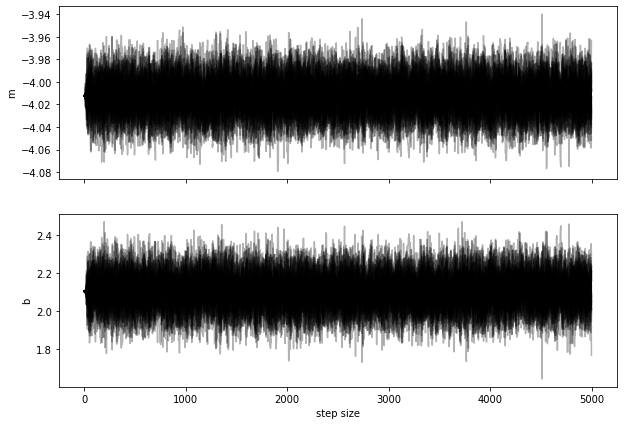

In [118]:
fig,axes=plt.subplots(2,figsize=(10,7),sharex=True)
samples=sampler.get_chain()
labels=['m','b']
for i in range(ndim):
  ax=axes[i]
  ax.plot(samples[:,:,i],'k',alpha=0.3)
  ax.set_ylabel(labels[i])
axes[-1].set_xlabel('step size')

Now we see the distribution of parameter as corner plot below:

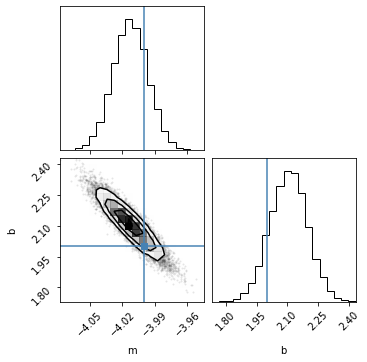

In [119]:
flat_samples=sampler.get_chain(discard=100,thin=15,flat=True)
fig=corner.corner(flat_samples,labels=labels,truths=[m_true,b_true])

In [120]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>